In [74]:
import pandas as pd
import numpy as np
import requests
from dotenv import load_dotenv
import os
from pprint import pprint
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

In [75]:
load_dotenv("../.env")

True

In [76]:
TOKEN = os.getenv("TOKEN")

In [77]:
pd.set_option("display.max_columns", None)

In [109]:
acutal_replay_url = "https://ballchasing.com/api/replays"
replay_headers = {
    "Authorization": TOKEN
}

replay_params = {
    'group': "all-blcs-2-games-12x79igbdo",
}

replay_response = requests.get(acutal_replay_url, headers=replay_headers, params=replay_params)

In [135]:
replay_df = pd.json_normalize(
    replay_response.json(),
    record_path=["list"]
)

In [136]:
replay_df.sort_values("rocket_league_id").head()

,id,link,rocket_league_id,replay_title,map_code,map_name,playlist_id,playlist_name,duration,overtime,overtime_seconds,season,season_type,date,date_has_tz,visibility,created,groups,uploader.steam_id,uploader.name,uploader.profile_url,uploader.avatar,blue.name,blue.goals,blue.players,orange.name,orange.goals,orange.players,recorder
31,4ef78fe9-a3e5-44cf-a6bf-56b75de2eba4,https://ballchasing.com/api/replays/4ef78fe9-a...,0068297B4AAC2545FB472FB925D9D6B0,0068297B4AAC2545FB472FB925D9D6B0,stadium_p,DFH Stadium,private,Private,357,False,NaN,16,free2play,2024-10-04T21:48:22-04:00,True,public,2024-10-05T02:10:48.0679Z,"[{'id': 'all-blcs-2-games-12x79igbdo', 'name':...",76561198389804286,Ray,https://steamcommunity.com/id/12358732764512736/,https://avatars.steamstatic.com/0b204bd59cb153...,EXECUTIVE PROJEC,3.0,"[{'start_time': 0, 'end_time': 357.04034, 'nam...",WONDER PETS,2.0,"[{'start_time': 0, 'end_time': 357.04034, 'nam...",NaN
18,d4168545-9a02-4550-a5f4-ff8f57e15eb4,https://ballchasing.com/api/replays/d4168545-9...,0294F25243AC172A21330BB09DF176BF,2024-10-04.21.01 Sym Private Loss,stadium_p,DFH Stadium,private,Private,342,False,NaN,16,free2play,2024-10-04T21:01:42-04:00,True,public,2024-10-11T22:20:19.495133Z,"[{'id': 'all-blcs-2-games-12x79igbdo', 'name':...",76561198966482468,buckystyle,https://steamcommunity.com/id/Buckystyle/,https://avatars.steamstatic.com/cd4d20c7ba686a...,SCAVS,3.0,"[{'start_time': 0, 'end_time': 342.106, 'name'...",WONDER PETS,1.0,"[{'start_time': 0, 'end_time': 342.106, 'name'...",NaN
33,9aac9827-581b-46e1-b039-70d29257d24f,https://ballchasing.com/api/replays/9aac9827-5...,057AD4DC4AB931E10DE07BBF5009D685,057AD4DC4AB931E10DE07BBF5009D685,stadium_p,DFH Stadium,private,Private,345,False,NaN,16,free2play,2024-10-04T22:01:31-04:00,True,public,2024-10-05T02:10:41.153162Z,"[{'id': 'all-blcs-2-games-12x79igbdo', 'name':...",76561198389804286,Ray,https://steamcommunity.com/id/12358732764512736/,https://avatars.steamstatic.com/0b204bd59cb153...,EXECUTIVE PROJEC,1.0,"[{'start_time': 0, 'end_time': 345.2616, 'name...",WONDER PETS,3.0,"[{'start_time': 0, 'end_time': 345.2616, 'name...",NaN
3,615b4d54-9e9b-4c02-8efc-9edf8419051a,https://ballchasing.com/api/replays/615b4d54-9...,0863EA1E4E12414D366BFE8AAE1A4434,0863EA1E4E12414D366BFE8AAE1A4434,stadium_p,DFH Stadium,private,Private,326,False,NaN,16,free2play,2024-10-19T22:03:08-04:00,True,public,2024-10-20T03:13:38.687519Z,"[{'id': 'minorities-vs-scavs-oa8xe3v00j', 'nam...",76561198035439444,Ankles,https://steamcommunity.com/id/ankles_rl/,https://avatars.steamstatic.com/669455ea319707...,SCAVS,2.0,"[{'start_time': 0, 'end_time': 326.8575, 'name...",MINORITIES,NaN,"[{'start_time': 0, 'end_time': 326.8575, 'name...",NaN
43,ca282cd3-9432-40dd-a2d2-5dbe6ddaa734,https://ballchasing.com/api/replays/ca282cd3-9...,09E8BA96493B363C3D847AA57764A617,game 2 L,stadium_foggy_p,DFH Stadium (Stormy),private,Private,382,True,50.0,16,free2play,2024-10-02T23:36:03-04:00,True,public,2024-10-03T03:56:13.464254Z,"[{'id': 'all-blcs-2-games-12x79igbdo', 'name':...",76561198966482468,buckystyle,https://steamcommunity.com/id/Buckystyle/,https://avatars.steamstatic.com/cd4d20c7ba686a...,KILLER B'S,1.0,"[{'start_time': 0, 'end_time': 382.7466, 'name...",MINORITIES,2.0,"[{'start_time': 0, 'end_time': 382.7466, 'name...",buckystyle


In [166]:
replay_df["groups"].explode()

0     {'id': 'the-amazing-win-for-the-beckyard-8yaz7...
0     {'id': 'all-blcs-2-games-12x79igbdo', 'name': ...
1     {'id': 'the-amazing-win-for-the-beckyard-8yaz7...
1     {'id': 'all-blcs-2-games-12x79igbdo', 'name': ...
2     {'id': 'the-amazing-win-for-the-beckyard-8yaz7...
                            ...                        
46    {'id': 'tragic-loss-for-the-new-team-i3wiw5mom...
47    {'id': 'all-blcs-2-games-12x79igbdo', 'name': ...
47    {'id': 'tragic-loss-for-the-new-team-i3wiw5mom...
48    {'id': 'all-blcs-2-games-12x79igbdo', 'name': ...
48    {'id': 'tragic-loss-for-the-new-team-i3wiw5mom...
Name: groups, Length: 93, dtype: object

In [168]:
pd.json_normalize(replay_df["groups"].explode())[pd.json_normalize(replay_df["groups"].explode())["id"] != "all-blcs-2-games-12x79igbdo"]["id"]

0     the-amazing-win-for-the-beckyard-8yaz7svh48
2     the-amazing-win-for-the-beckyard-8yaz7svh48
4     the-amazing-win-for-the-beckyard-8yaz7svh48
6                  minorities-vs-scavs-oa8xe3v00j
8                  minorities-vs-scavs-oa8xe3v00j
10                 minorities-vs-scavs-oa8xe3v00j
12                 minorities-vs-scavs-oa8xe3v00j
19     killer-bs-vs-executive-projects-pgnoqhuica
21     killer-bs-vs-executive-projects-pgnoqhuica
23     killer-bs-vs-executive-projects-pgnoqhuica
25     killer-bs-vs-executive-projects-pgnoqhuica
28                 scavs-vs-wonderpets-q76r7pzsrb
30                 scavs-vs-wonderpets-q76r7pzsrb
32                 scavs-vs-wonderpets-q76r7pzsrb
34                 scavs-vs-wonderpets-q76r7pzsrb
36                 scavs-vs-wonderpets-q76r7pzsrb
38          pushin-pullis-vs-killer-bs-bvfxjz0di9
40          pushin-pullis-vs-killer-bs-bvfxjz0di9
42          pushin-pullis-vs-killer-bs-bvfxjz0di9
44          pushin-pullis-vs-killer-bs-bvfxjz0di9


In [173]:
REPLAY_DETAIL_URL = "https://ballchasing.com/api/replays/{replay_id}"

In [253]:
replay_df.head()

,id,rocket_league_id,map_name,duration,overtime_seconds,date,created,groups,blue.name,blue.goals,blue.players,orange.name,orange.goals,orange.players
0,e6b6318f-daac-46ab-98f5-34d3978ee1b8,AD91CC634ED5DC74E19C7BB5EDC7E94C,Forbidden Temple (Fire & Ice),421,57.0,2024-10-19T23:50:59-04:00,2024-10-20T04:12:11.807174Z,[{'id': 'the-amazing-win-for-the-beckyard-8yaz...,BECKYARDIGANS,4.0,"[{'start_time': 0, 'end_time': 421.25095, 'nam...",PUSHIN PULLIS,3.0,"[{'start_time': 0, 'end_time': 421.25095, 'nam..."
1,928a8dd6-f231-40ee-bddd-5839a31b6d88,294534B344FFEA88AE723DA331326029,DFH Stadium (Stormy),354,NaN,2024-10-19T23:58:30-04:00,2024-10-20T04:12:07.80585Z,[{'id': 'the-amazing-win-for-the-beckyard-8yaz...,BECKYARDIGANS,5.0,"[{'start_time': 0, 'end_time': 354.43304, 'nam...",PUSHIN PULLIS,NaN,"[{'start_time': 0, 'end_time': 354.43304, 'nam..."
2,692c6b93-8110-4417-9189-91c078e9b11f,2C1E22584739B12E4CA4FFA6658C0EC9,Sovereign Heights (Dusk),427,NaN,2024-10-20T00:08:21-04:00,2024-10-20T04:12:04.280111Z,[{'id': 'the-amazing-win-for-the-beckyard-8yaz...,BECKYARDIGANS,10.0,"[{'start_time': 0, 'end_time': 427.1843, 'name...",PUSHIN PULLIS,3.0,"[{'start_time': 0, 'end_time': 427.1843, 'name..."
3,615b4d54-9e9b-4c02-8efc-9edf8419051a,0863EA1E4E12414D366BFE8AAE1A4434,DFH Stadium,326,NaN,2024-10-19T22:03:08-04:00,2024-10-20T03:13:38.687519Z,"[{'id': 'minorities-vs-scavs-oa8xe3v00j', 'nam...",SCAVS,2.0,"[{'start_time': 0, 'end_time': 326.8575, 'name...",MINORITIES,NaN,"[{'start_time': 0, 'end_time': 326.8575, 'name..."
4,4c995189-d5e6-4c36-86a8-59d64d8d3f0c,66D99D1B4BDBB1124A16768F19A35029,DFH Stadium,351,NaN,2024-10-19T22:10:00-04:00,2024-10-20T03:13:36.137949Z,"[{'id': 'minorities-vs-scavs-oa8xe3v00j', 'nam...",SCAVS,3.0,"[{'start_time': 0, 'end_time': 351.4118, 'name...",MINORITIES,2.0,"[{'start_time': 0, 'end_time': 351.4118, 'name..."


In [ ]:
replay_df.to_parquet("../data/parquet/replay_df.parquet")

In [228]:
important_features = ["id", "rocket_league_id", "map_name", "duration", "overtime_seconds", "date", "created", "groups", "blue.name", "blue.goals", "orange.name", "orange.goals"]

In [204]:
replay_df = replay_df[important_features]

In [250]:
# Step 1: Explode the 'blue.players' column and create a new DataFrame with the 'id' column
blue_expanded = replay_df[important_features + ['blue.players']].explode('blue.players').reset_index(drop=True)

# Step 2: Flatten the 'blue.players' column and create a separate DataFrame
blue_expanded['blue_platform'] = blue_expanded['blue.players'].apply(lambda x: x['id']['platform'])
blue_expanded['blue_player_id'] = blue_expanded['blue.players'].apply(lambda x: x['id']['id'])
blue_expanded['blue_name'] = blue_expanded['blue.players'].apply(lambda x: x['name'])
blue_expanded['blue_score'] = blue_expanded['blue.players'].apply(lambda x: x['score'])
blue_expanded['blue_mvp'] = blue_expanded['blue.players'].apply(lambda x: x.get('mvp', False))  # MVP may be absent for some players

# Step 3: Explode the 'groups' column and filter out the unwanted IDs
blue_expanded = blue_expanded.explode('groups').reset_index(drop=True)
blue_expanded['group_id'] = blue_expanded['groups'].apply(lambda x: x['id'] if isinstance(x, dict) else None)
blue_expanded = blue_expanded[blue_expanded['group_id'] != 'all-blcs-2-games-12x79igbdo']

# Step 4: Drop the original 'groups' and 'blue.players' columns
blue_df = blue_expanded.drop(columns=['groups', 'blue.players'])

# Step 5: Explode the 'orange.players' column and create a new DataFrame with the 'id' column
orange_expanded = replay_df[important_features + ['orange.players']].explode('orange.players').reset_index(drop=True)

# Step 6: Flatten the 'orange.players' column and create a separate DataFrame
orange_expanded['orange_platform'] = orange_expanded['orange.players'].apply(lambda x: x['id']['platform'])
orange_expanded['orange_player_id'] = orange_expanded['orange.players'].apply(lambda x: x['id']['id'])
orange_expanded['orange_name'] = orange_expanded['orange.players'].apply(lambda x: x['name'])
orange_expanded['orange_score'] = orange_expanded['orange.players'].apply(lambda x: x['score'])
orange_expanded['orange_mvp'] = orange_expanded['orange.players'].apply(lambda x: x.get('mvp', False))

# Step 7: Explode the 'groups' column and filter out the unwanted IDs
orange_expanded = orange_expanded.explode('groups').reset_index(drop=True)
orange_expanded['group_id'] = orange_expanded['groups'].apply(lambda x: x['id'] if isinstance(x, dict) else None)
orange_expanded = orange_expanded[orange_expanded['group_id'] != 'all-blcs-2-games-12x79igbdo']

# Step 8: Drop the original 'groups' and 'orange.players' columns
orange_df = orange_expanded.drop(columns=['groups', 'orange.players'])

In [257]:
blue_df.to_parquet("../data/parquet/blue_df.parquet")

In [258]:
orange_df.to_parquet("../data/parquet/orange_df.parquet")

In [78]:
replay_url = "https://ballchasing.com/api/groups/all-blcs-2-games-12x79igbdo"
headers = {
    'Authorization': TOKEN
}

response = requests.get(replay_url, headers=headers)
response

<Response [200]>

In [79]:
url = 'https://ballchasing.com/group/all-blcs-2-games-12x79igbdo/teams-stats'

response_bs = requests.get(url)

html_content = response_bs.text

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table in the HTML
table = soup.find('table', {'class': 'stats-table'})

# Ensure the table was found
if table:
    # Extract headers
    headers = []
    for th in table.find('thead').find_all('th'):
        header = th.text.strip()
        headers.append(header)

    # Extract rows
    rows = []
    for tr in table.find('tbody').find_all('tr'):
        cells = tr.find_all(['td', 'th'])
        row = [cell.text.strip() for cell in cells]
        rows.append(row)

    # Create a DataFrame
    df_bs = pd.DataFrame(rows, columns=headers)

df_bs

,Team,Games,Win %,Score,Shots,Goals,ShootingPercentage,ShotsConceded,GoalsConceded,Assists,Saves,DemosInflicted,DemosTaken
0,BECKYARDIGANS\n \n\n ...,8,62.50 %,1218.50,11.00,3.38,30.68 %,6.88,2.50,2.25,3.50,2.38,1.50
1,KILLER BS\n \n\n ...,12,58.33 %,994.42,7.92,2.17,27.37 %,7.25,2.08,1.33,3.75,3.67,3.92
2,EXECUTIVE PROJEC\n \n\n...,14,42.86 %,962.14,7.00,2.14,30.61 %,7.79,2.57,1.43,3.79,3.14,3.29
3,MINORITIES\n \n\n ...,8,50.00 %,1073.25,6.25,1.88,30.00 %,8.50,1.38,1.38,5.50,3.62,3.12
4,WONDER PETS\n \n\n ...,14,42.86 %,991.29,6.43,1.86,28.89 %,8.50,2.00,1.00,4.86,2.57,2.29
5,WONDER PETS\n \n\n ...,1,100.00 %,918.00,6.00,2.00,33.33 %,5.00,0.00,1.00,3.00,0.00,3.00
6,PUSHIN PULLIS\n \n\n ...,12,25.00 %,942.92,7.00,1.58,22.62 %,9.17,3.00,0.92,4.42,2.75,2.17
7,DIDDLERS\n \n\n ...,15,53.33 %,1020.53,8.00,2.13,26.67 %,6.60,2.07,1.60,3.60,2.80,2.60
8,SCAVS\n \n\n ...,14,64.29 %,1099.00,8.57,2.29,26.67 %,7.07,1.57,1.86,4.43,1.64,2.86


In [80]:
df_bs.iloc[:]

,Team,Games,Win %,Score,Shots,Goals,ShootingPercentage,ShotsConceded,GoalsConceded,Assists,Saves,DemosInflicted,DemosTaken
0,BECKYARDIGANS\n \n\n ...,8,62.50 %,1218.50,11.00,3.38,30.68 %,6.88,2.50,2.25,3.50,2.38,1.50
1,KILLER BS\n \n\n ...,12,58.33 %,994.42,7.92,2.17,27.37 %,7.25,2.08,1.33,3.75,3.67,3.92
2,EXECUTIVE PROJEC\n \n\n...,14,42.86 %,962.14,7.00,2.14,30.61 %,7.79,2.57,1.43,3.79,3.14,3.29
3,MINORITIES\n \n\n ...,8,50.00 %,1073.25,6.25,1.88,30.00 %,8.50,1.38,1.38,5.50,3.62,3.12
4,WONDER PETS\n \n\n ...,14,42.86 %,991.29,6.43,1.86,28.89 %,8.50,2.00,1.00,4.86,2.57,2.29
5,WONDER PETS\n \n\n ...,1,100.00 %,918.00,6.00,2.00,33.33 %,5.00,0.00,1.00,3.00,0.00,3.00
6,PUSHIN PULLIS\n \n\n ...,12,25.00 %,942.92,7.00,1.58,22.62 %,9.17,3.00,0.92,4.42,2.75,2.17
7,DIDDLERS\n \n\n ...,15,53.33 %,1020.53,8.00,2.13,26.67 %,6.60,2.07,1.60,3.60,2.80,2.60
8,SCAVS\n \n\n ...,14,64.29 %,1099.00,8.57,2.29,26.67 %,7.07,1.57,1.86,4.43,1.64,2.86


In [81]:
json = response.json()
df = pd.json_normalize(
    json,
    record_path=["players"],
)

In [83]:
df.loc[15, "cumulative.games"] = df.loc[15, "cumulative.games"]-1
df.loc[15, "cumulative.wins"] = df.loc[15, "cumulative.wins"]-1
df.loc[15, "cumulative.win_percentage"] = df.loc[6, "cumulative.win_percentage"]
df.loc[15, "cumulative.play_duration"] = df.loc[6, "cumulative.play_duration"]
df.loc[15, "cumulative.core.shots_against"] = df.loc[6, "cumulative.core.shots_against"]
df.loc[15, "game_average.core.goals_against"] = df.loc[6, "game_average.core.goals_against"]
df.loc[15, "game_average.core.shots_against"] = df.loc[6, "game_average.core.shots_against"]

In [85]:
grouped = df.groupby("team")

team_stats = {}

for team_name, group in grouped:
    unique_counts = group.nunique()
    columns_with_single_val = unique_counts[unique_counts==1].index.tolist()

    team_stat_vals = group[columns_with_single_val].iloc[0]

    team_stats[team_name] = team_stat_vals

In [86]:
team_stats_df = pd.DataFrame(team_stats).transpose()

team_stats_df.reset_index(inplace=True)

team_stats_df.rename(columns={"index":'team'}, inplace=True)

team_stats_df = team_stats_df.iloc[:, :-2]

team_stats_df

,team,cumulative.core.goals_against,cumulative.core.mvp,cumulative.core.shots_against,cumulative.games,cumulative.play_duration,cumulative.win_percentage,cumulative.wins,game_average.core.goals_against,game_average.core.mvp,game_average.core.shots_against
0,BECKYARDIGANS,20,0,55,8,3015,62.5,5,2.5,0,6.875
1,DIDDLERS,31,0,99,15,5434,53.333332,8,2.066667,0,6.6
2,EXECUTIVE PROJEC,36,0,109,14,4982,42.857143,6,2.571429,0,7.785714
3,KILLER BS,25,0,87,12,4272,58.333332,7,2.083333,0,7.25
4,MINORITIES,11,0,68,8,2740,50.0,4,1.375,0,8.5
5,PUSHIN PULLIS,36,0,110,12,4405,25.0,3,3.0,0,9.166667
6,SCAVS,22,0,99,14,4876,64.28571,9,1.571428,0,7.071429
7,WONDER PETS,28,0,124,15,5254,46.666668,7,1.866667,0,8.266666


In [260]:
team_stats_df.to_parquet("../data/parquet/team_stats_df.parquet")

In [87]:
team_dicts = {
    "BECKYARDIGANS": "BECKYARDIGANS",
    "KILLER": "KILLER BS",
    "DIDDLERS":"DIDDLERS",
    "EXECUTIVE": "EXECUTIVE PROJEC",
    "MINORITIES":"MINORITIES",
    "PUSHIN":"PUSHIN PULLIS",
    "SCAVS":"SCAVS",
    "WONDER":"WONDER PETS"
}

In [88]:
import re
df_bs["Team"] = df_bs["Team"].apply(lambda x: x.replace("\n", "")).str.extract(r'^(\S+)', expand=False)
df_bs["Team"] = df_bs["Team"].map(team_dicts)

In [89]:
df_bs["Win %"] = df_bs["Win %"].apply(lambda x: float(str(x).replace(" %", "")), 2)

C:\Users\riain\AppData\Local\Temp\ipykernel_29216\3308302946.py:1: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  df_bs["Win %"] = df_bs["Win %"].apply(lambda x: float(str(x).replace(" %", "")), 2)


In [90]:
df_bs.loc[4, "Games"] = team_stats_df.loc[7, "cumulative.games"]
df_bs.loc[4, "Win %"] = team_stats_df.loc[7, "cumulative.win_percentage"]
df_bs.loc[4, "Score"] = team_stats_df.loc[7, "cumulative.games"]

average_score = (df.loc[21, "cumulative.core.score"] + df.loc[18, "cumulative.core.score"] + df.loc[11, "cumulative.core.score"]) / df.loc[21, "cumulative.games"]
df_bs.loc[4, "Score"] = average_score

In [91]:
team_goals_df = df.groupby("team")["cumulative.core.goals"].sum().reset_index()
team_goals_df

,team,cumulative.core.goals
0,BECKYARDIGANS,27
1,DIDDLERS,32
2,EXECUTIVE PROJEC,30
3,KILLER BS,26
4,MINORITIES,15
5,PUSHIN PULLIS,19
6,SCAVS,32
7,WONDER PETS,28


In [92]:
teams_goals_against = dict(zip(df["team"], df["cumulative.core.goals_against"]))
teams_goals = dict(zip(team_goals_df["team"], team_goals_df["cumulative.core.goals"]))

df_bs["Goals Against"] = df_bs["Team"].map(teams_goals_against)
df_bs["Goals For"] = df_bs["Team"].map(teams_goals)

In [93]:
demos_inflicted_df = df.groupby("team")["cumulative.demo.inflicted"].sum().reset_index()
demos_taken_df = df.groupby("team")["cumulative.demo.taken"].sum().reset_index()

In [94]:
demos_inflicted = dict(zip(demos_inflicted_df["team"], demos_inflicted_df["cumulative.demo.inflicted"]))
demos_taken = dict(zip(demos_taken_df["team"], demos_taken_df["cumulative.demo.taken"]))

In [95]:
demos_inflicted_df

,team,cumulative.demo.inflicted
0,BECKYARDIGANS,19
1,DIDDLERS,42
2,EXECUTIVE PROJEC,44
3,KILLER BS,44
4,MINORITIES,29
5,PUSHIN PULLIS,33
6,SCAVS,23
7,WONDER PETS,36


In [96]:
df_bs["Demos Inflicted"] = df_bs["Team"].map(demos_inflicted)
df_bs["Demos Taken"] = df_bs["Team"].map(demos_taken)

In [97]:
shots_for_df = df.groupby("team")["cumulative.core.shots"].sum().reset_index()
shots_against_df = df.groupby('team')["cumulative.core.shots_against"].sum().reset_index()

In [98]:
shots_for = dict(zip(shots_for_df["team"], shots_for_df["cumulative.core.shots"]))
shots_against = dict(zip(df["team"], df["cumulative.core.shots_against"]))

In [99]:
df_bs["Shots For"] = df_bs["Team"].map(shots_for)
df_bs["Shots Against"] = df_bs["Team"].map(shots_against)

In [100]:
df_bs = df_bs.drop(5, axis=0)

In [101]:
df_bs

,Team,Games,Win %,Score,Shots,Goals,ShootingPercentage,ShotsConceded,GoalsConceded,Assists,Saves,DemosInflicted,DemosTaken,Goals Against,Goals For,Demos Inflicted,Demos Taken,Shots For,Shots Against
0,BECKYARDIGANS,8,62.500000,1218.50,11.00,3.38,30.68 %,6.88,2.50,2.25,3.50,2.38,1.50,20,27,19,12,88,55
1,KILLER BS,12,58.330000,994.42,7.92,2.17,27.37 %,7.25,2.08,1.33,3.75,3.67,3.92,25,26,44,47,95,87
2,EXECUTIVE PROJEC,14,42.860000,962.14,7.00,2.14,30.61 %,7.79,2.57,1.43,3.79,3.14,3.29,36,30,44,46,98,109
3,MINORITIES,8,50.000000,1073.25,6.25,1.88,30.00 %,8.50,1.38,1.38,5.50,3.62,3.12,11,15,29,25,50,68
4,WONDER PETS,15,46.666668,986.4,6.43,1.86,28.89 %,8.50,2.00,1.00,4.86,2.57,2.29,28,28,36,35,96,124
6,PUSHIN PULLIS,12,25.000000,942.92,7.00,1.58,22.62 %,9.17,3.00,0.92,4.42,2.75,2.17,36,19,33,26,84,110
7,DIDDLERS,15,53.330000,1020.53,8.00,2.13,26.67 %,6.60,2.07,1.60,3.60,2.80,2.60,31,32,42,39,120,99
8,SCAVS,14,64.290000,1099.00,8.57,2.29,26.67 %,7.07,1.57,1.86,4.43,1.64,2.86,22,32,23,40,120,99


In [263]:
df_bs["Games"] = df_bs["Games"].astype(int)

In [266]:
df_bs.to_excel("../data/excel_files/team_stats.xlsx")
df_bs[["Team", "Win %", "Games", "Goals Against", "Goals For", "Demos Inflicted", "Demos Taken", "Shots For", "Shots Against"]].to_parquet("../data/parquet/better_team_stats.parquet")

In [102]:
team_stats_rankings = team_stats_df.sort_values(by="cumulative.win_percentage", ascending=False).reset_index(drop=True)


In [103]:
os.makedirs("../data/excel_files", exist_ok=True)

team_stats_rankings.to_excel("../data/excel_files/team_rankings_descending.xlsx")
df.to_excel('../data/excel_files/players_data.xlsx')
df_bs.to_excel("../data/excel_files/better_team_data.xlsx")

- collected the data
- eda stuffed and transformation
- prefect
- discord bot -> update the stats
- prefect refresh time 2-3 am
- power rankings: strength of victory

win %, shots for against, goals for against, demos for against

In [242]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [255]:
# Function to highlight the row based on which team has more goals
def highlight_winner(row):
    if row['blue_goals'] > row['orange_goals']:
        return ['background-color: lightblue'] * len(row)  # Blue team wins
    elif row['orange_goals'] > row['blue_goals']:
        return ['background-color: orange'] * len(row)  # Orange team wins
    else:
        return ['background-color: lightgreen'] * len(row)  # Tie

In [235]:
def create_barplot(df, x_col, y_col, save_path=None):
    """
    Create a bar plot with a dark blue and light gold theme and a white background.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    x_col (str): The column name for the x-axis.
    y_col (str): The column name for the y-axis.
    save_path (str, optional): The file path to save the plot. If None, the plot won't be saved.
    """

    # Set a clean white background and apply custom color palette
    sns.set_theme(style="whitegrid")
    custom_palette = ["#1f3d7a", "#f5c542"]  # Dark blue and light gold

    # Set font size and other rcParams for better appearance
    plt.rcParams.update({
        'axes.labelsize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'axes.titlesize': 16,
        'figure.figsize': (15, 7),
        'axes.facecolor': '#ffffff',  # White background
        'axes.edgecolor': '#1f3d7a',  # Dark blue border
        'grid.color': '#dddddd',  # Light gray gridlines for subtlety
        'text.color': '#1f3d7a',  # Dark blue text
        'axes.labelcolor': '#1f3d7a',  # Dark blue labels
        'xtick.color': '#1f3d7a',  # X-ticks to dark blue
        'ytick.color': '#1f3d7a'   # Y-ticks to dark blue
    })

    # Create the bar plot
    plt.figure(figsize=(15, 7))
    sns.barplot(
        data=df,
        x=x_col,
        y=y_col,
        palette=custom_palette
    )

    # Remove the right and top spines for a clean look
    sns.despine(right=True, top=True)

    # Set the title and labels
    plt.title(f"{y_col} vs {x_col}", color="#1f3d7a")
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    # Save the plot if a save path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches="tight", dpi=300)

    # Show the plot
    plt.show()

C:\Users\riain\AppData\Local\Temp\ipykernel_29216\2299796364.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\riain\AppData\Local\Temp\ipykernel_29216\2299796364.py:34: UserWarning: 
The palette list has fewer values (2) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


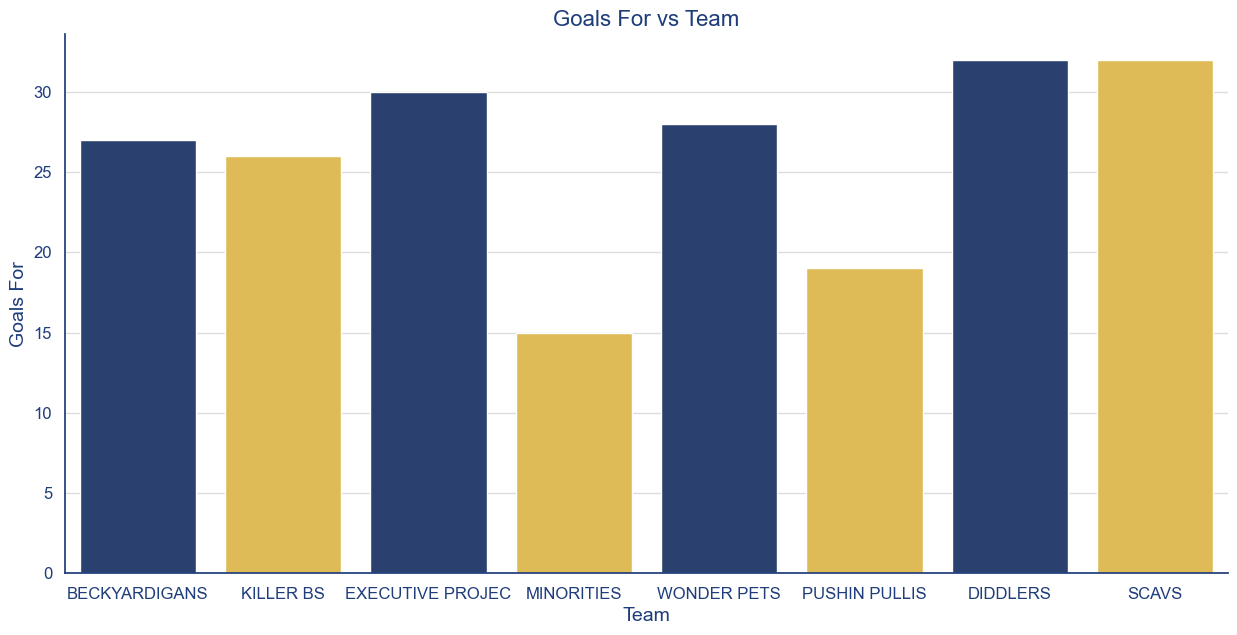

In [236]:
create_barplot(df=df_bs, x_col="Team", y_col="Goals For", save_path="../images/goals_for_vs_team.png")

C:\Users\riain\AppData\Local\Temp\ipykernel_29216\2299796364.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\riain\AppData\Local\Temp\ipykernel_29216\2299796364.py:34: UserWarning: 
The palette list has fewer values (2) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


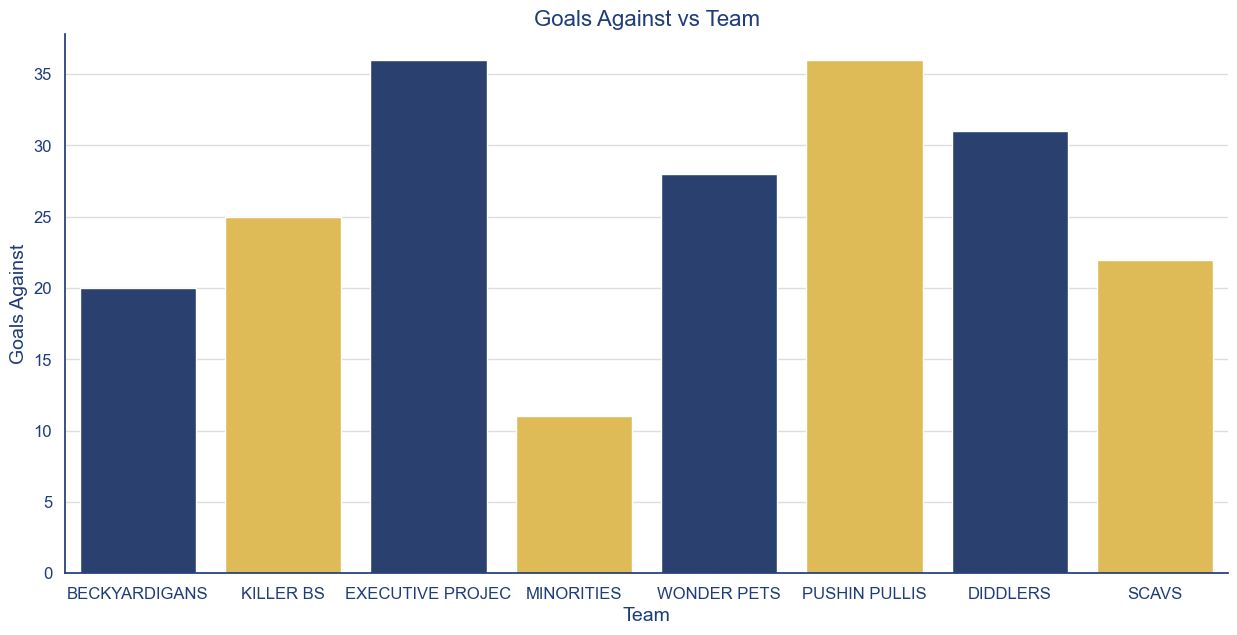

In [237]:
create_barplot(df=df_bs, x_col="Team", y_col="Goals Against", save_path="../images/goals_against_vs_team.png")

C:\Users\riain\AppData\Local\Temp\ipykernel_29216\2299796364.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\riain\AppData\Local\Temp\ipykernel_29216\2299796364.py:34: UserWarning: 
The palette list has fewer values (2) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


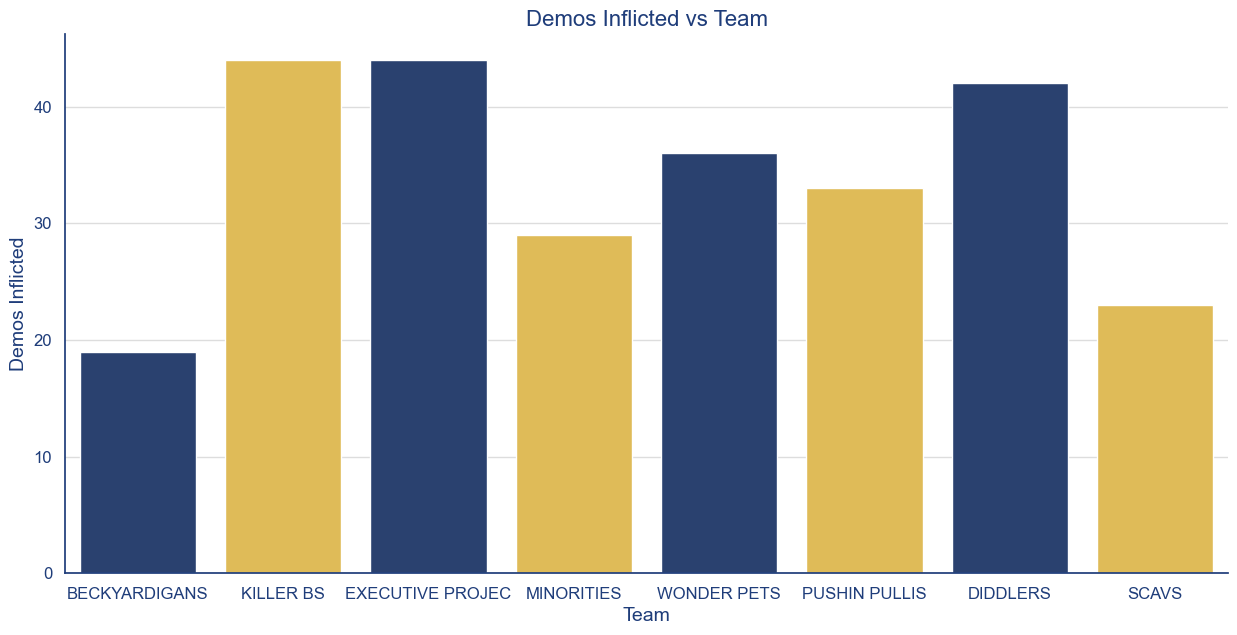

In [238]:
create_barplot(df=df_bs, x_col="Team", y_col="Demos Inflicted", save_path="../images/demos_inflicted_vs_team.png")

C:\Users\riain\AppData\Local\Temp\ipykernel_29216\2299796364.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\riain\AppData\Local\Temp\ipykernel_29216\2299796364.py:34: UserWarning: 
The palette list has fewer values (2) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


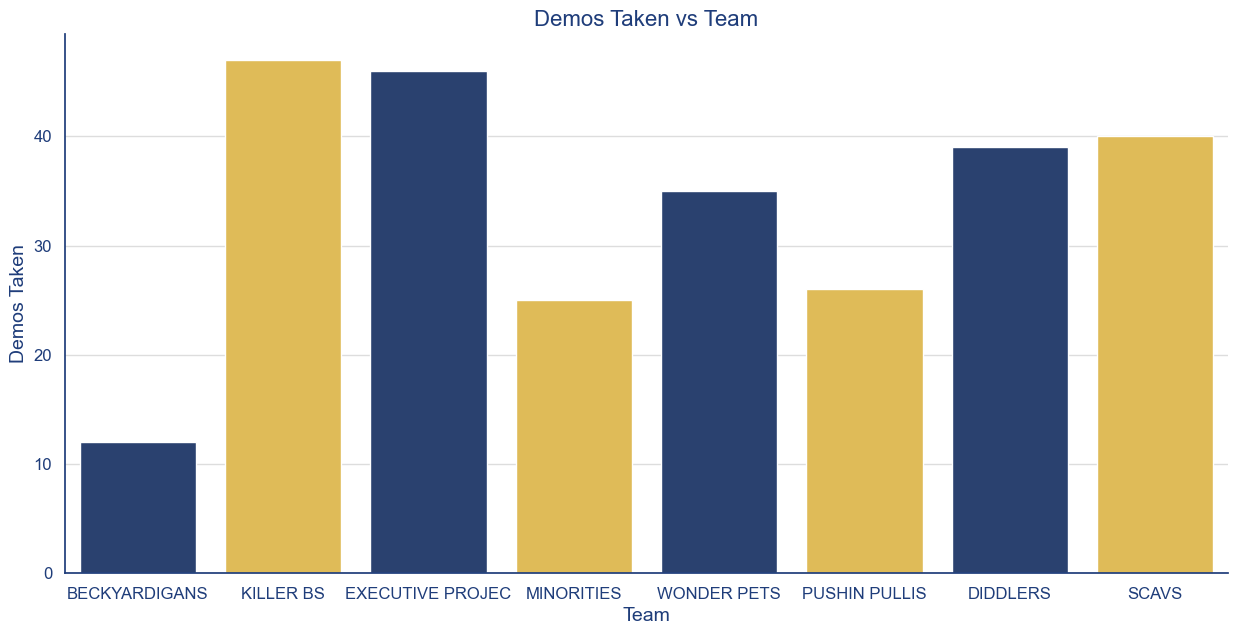

In [239]:
create_barplot(df=df_bs, x_col="Team", y_col="Demos Taken", save_path="../images/demos_taken_vs_team.png")